  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


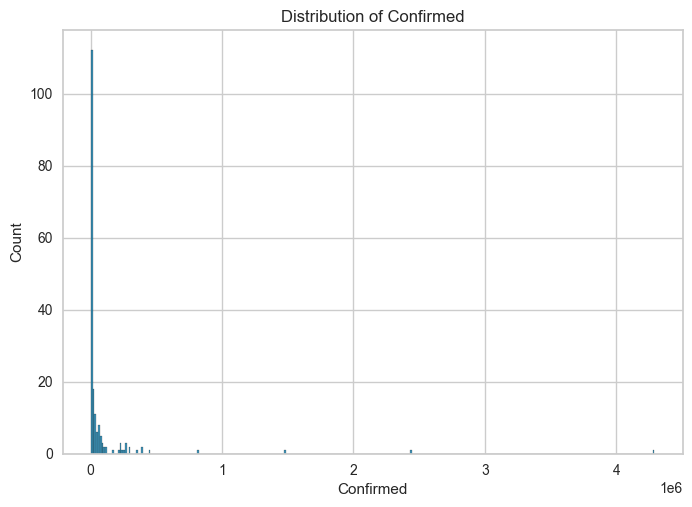

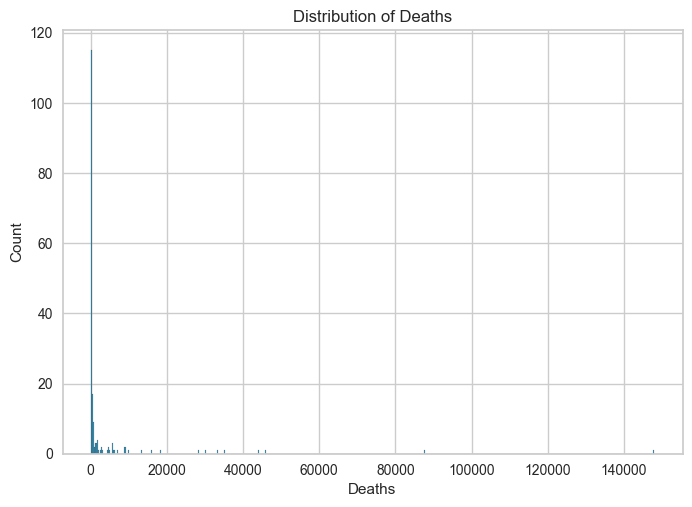

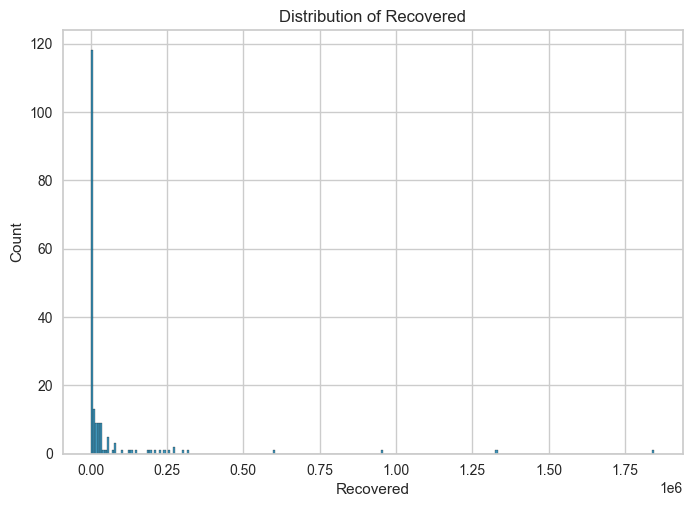

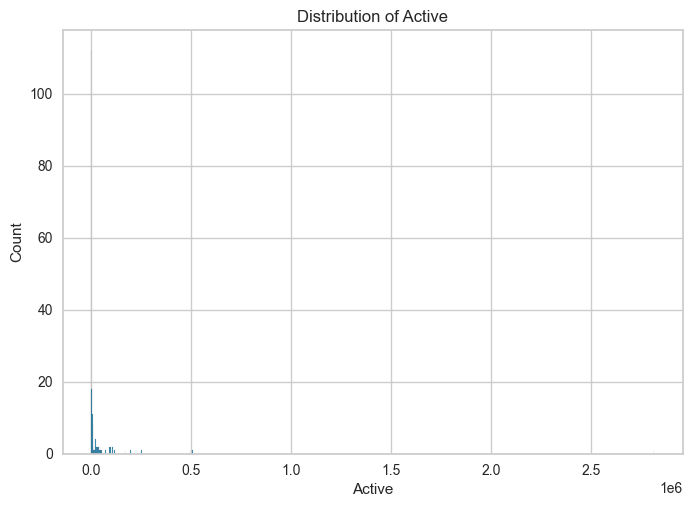

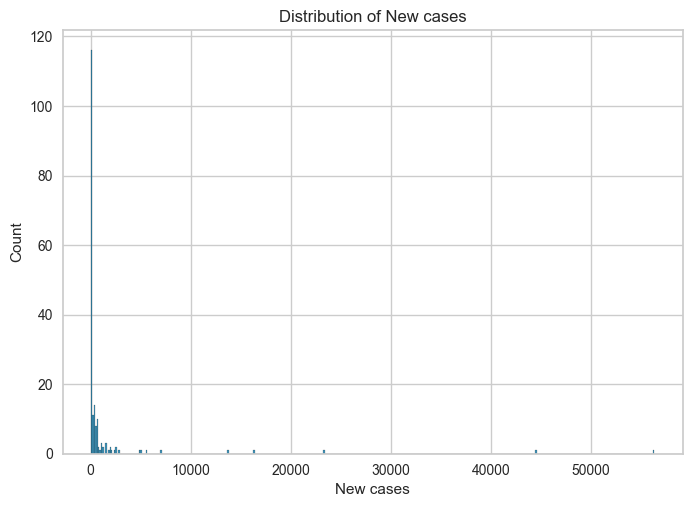

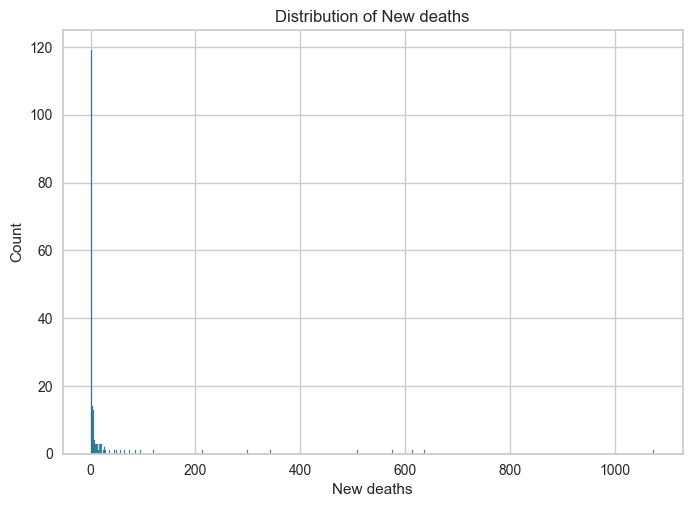

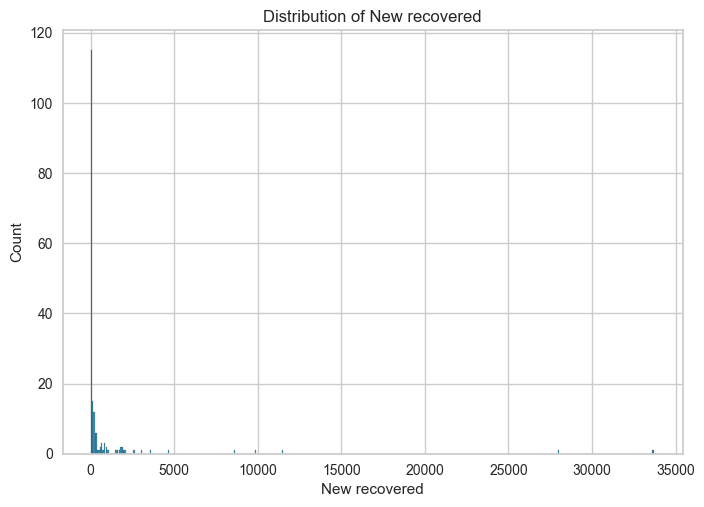

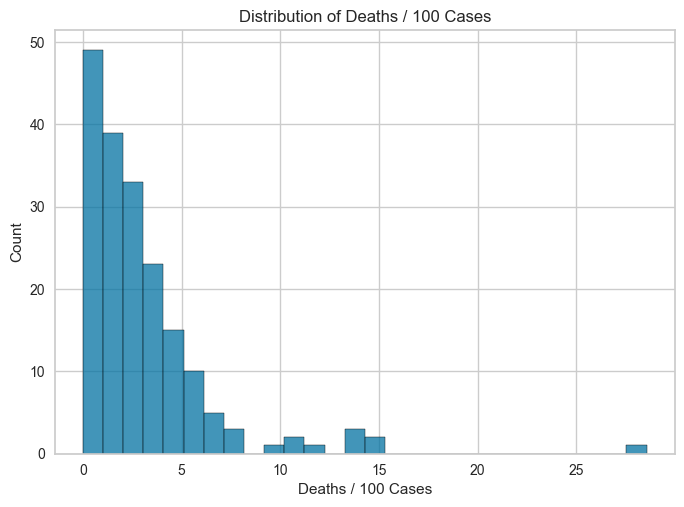

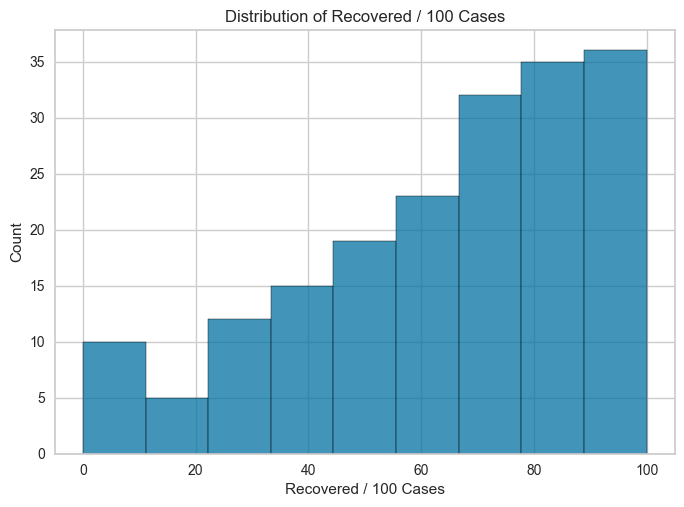

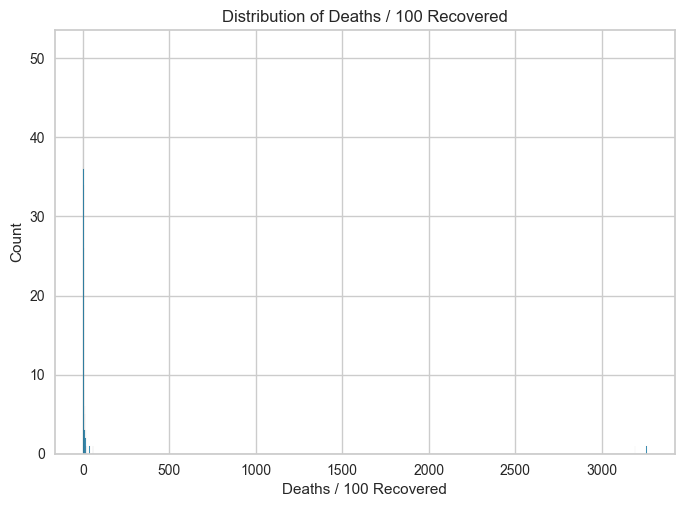

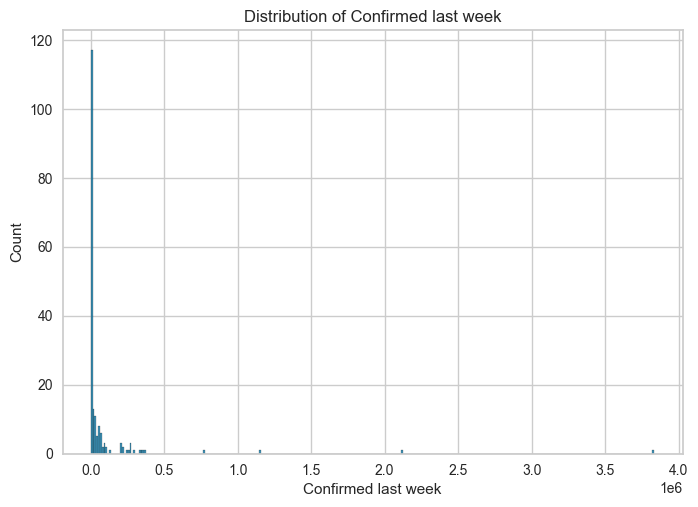

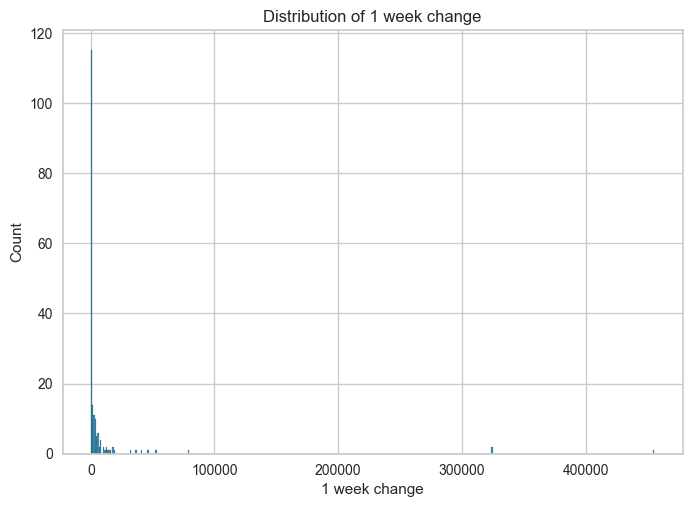

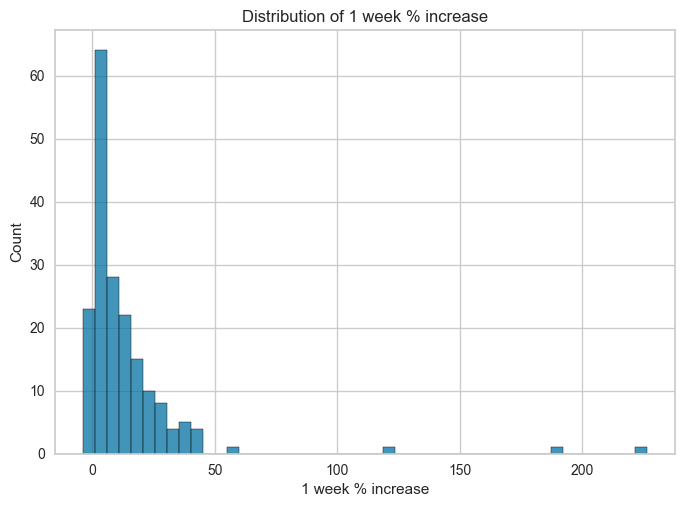

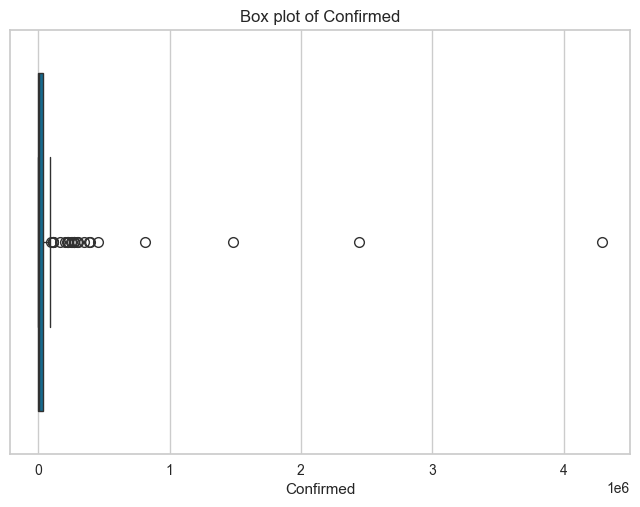

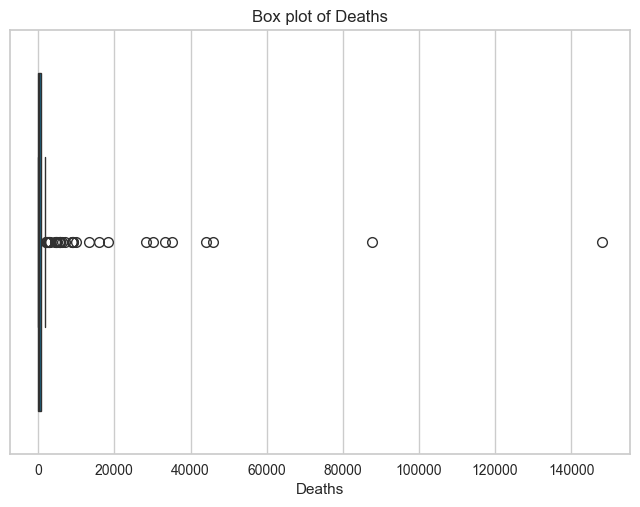

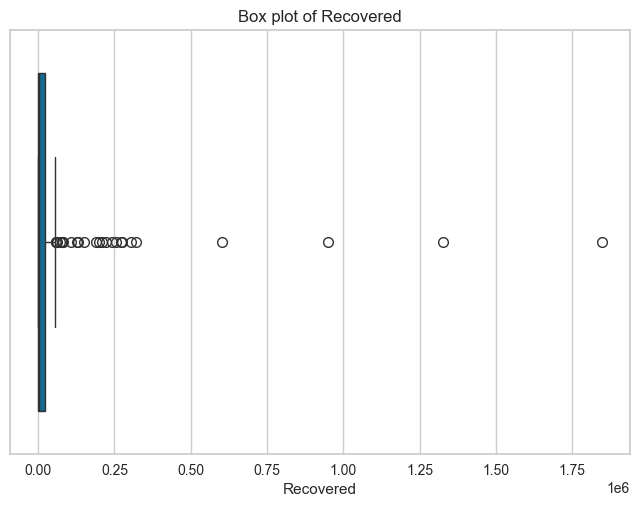

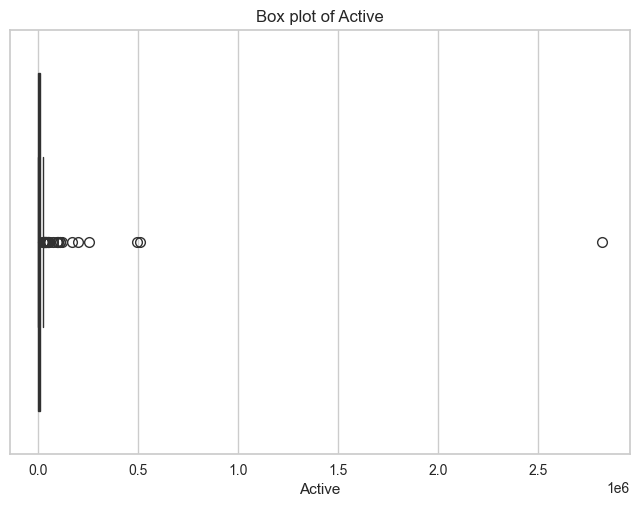

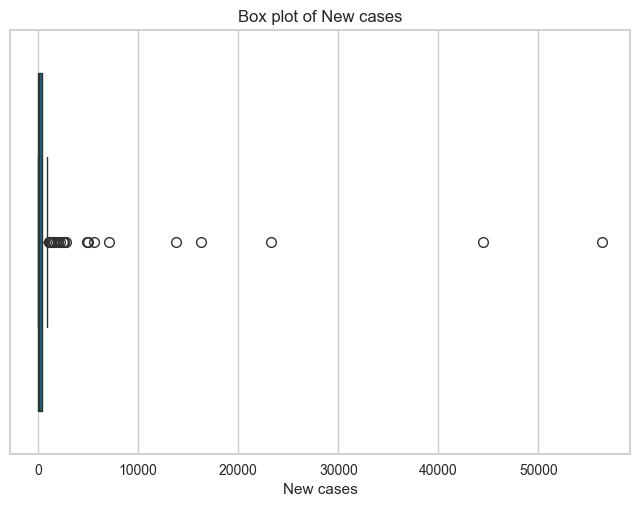

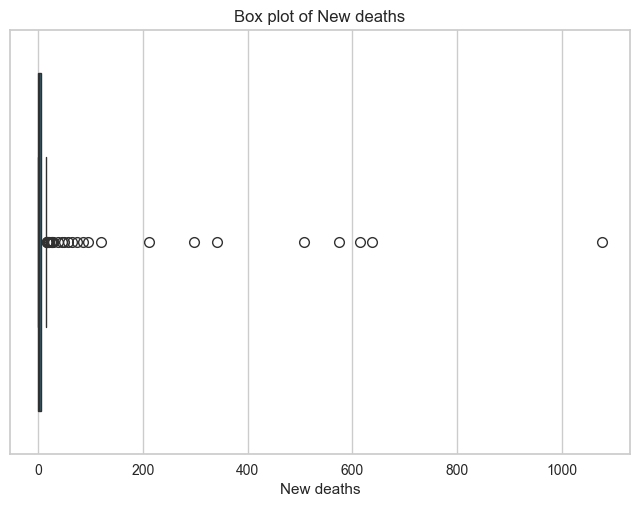

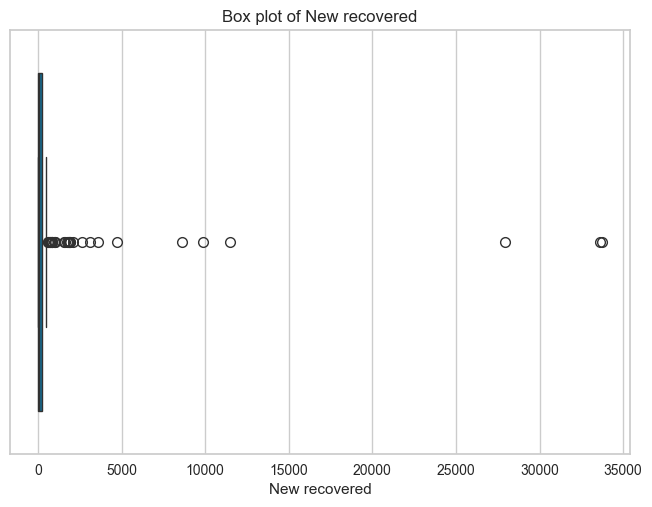

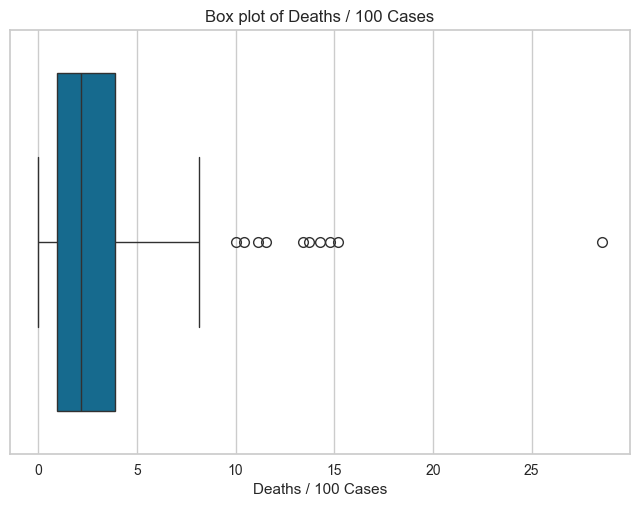

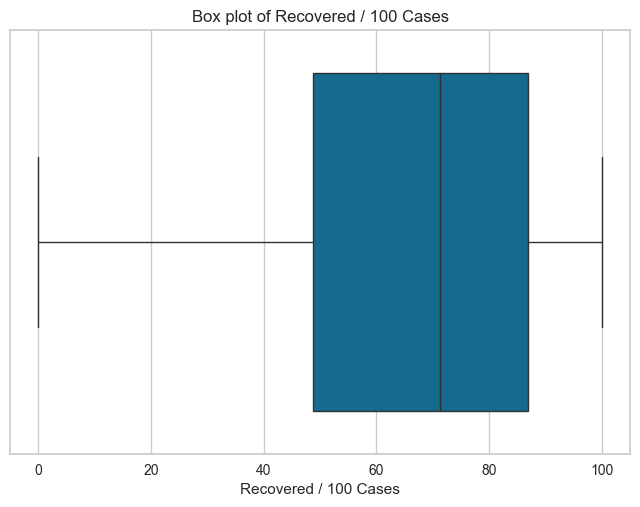

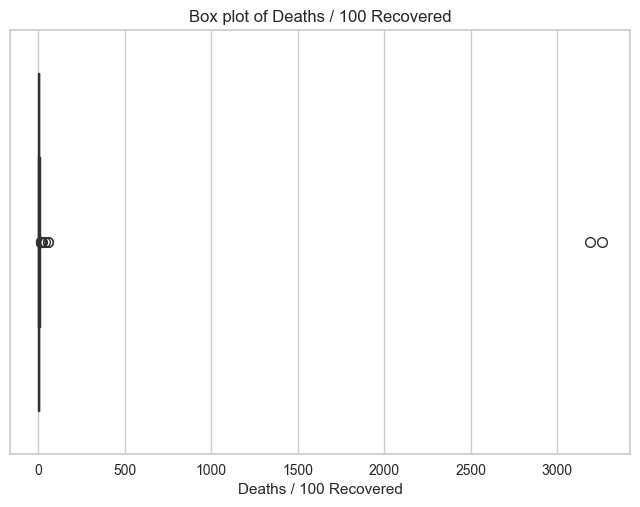

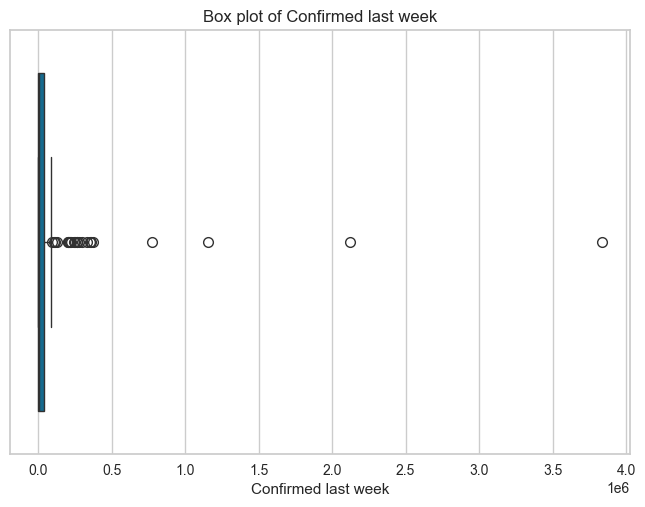

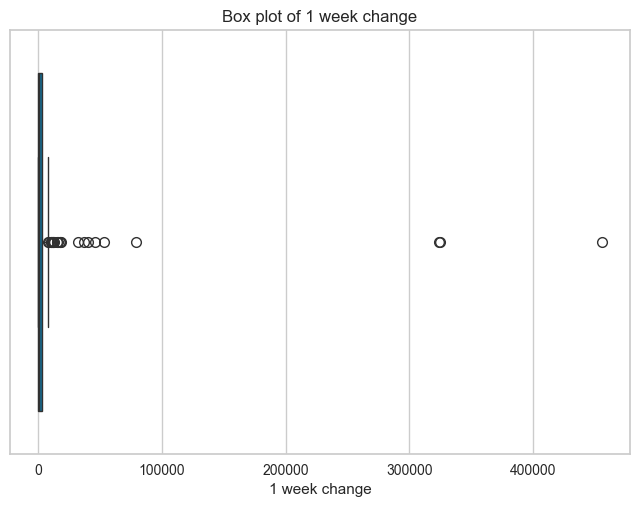

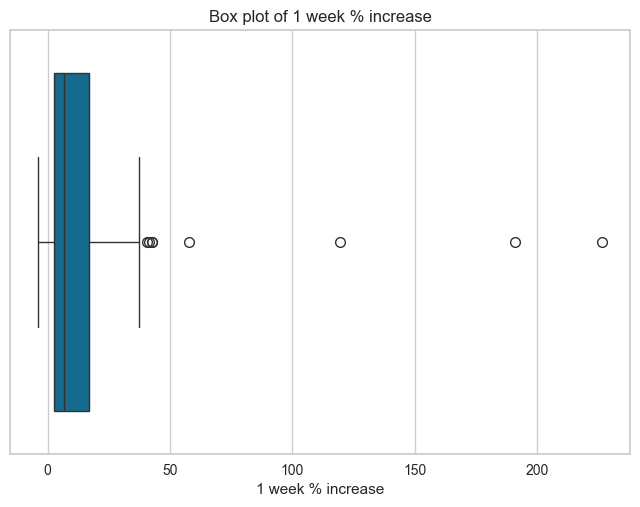

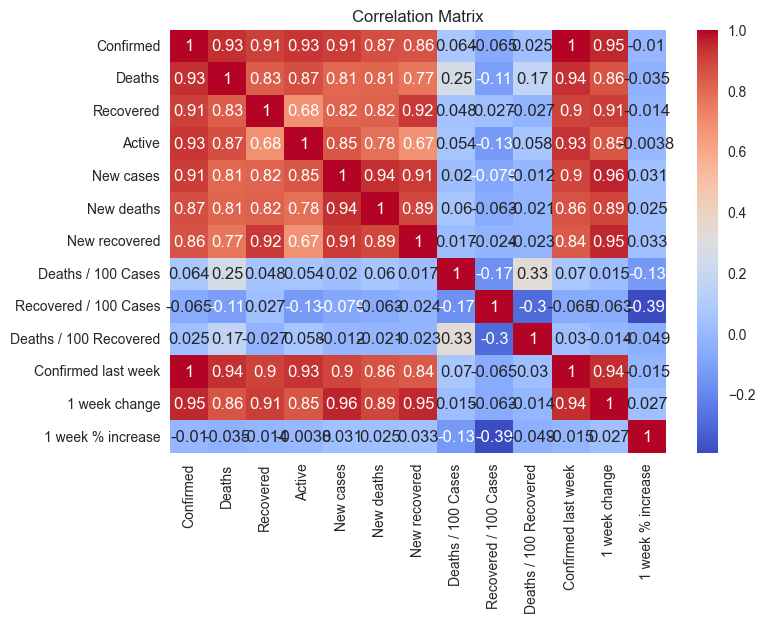

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("country_wise_latest.csv")

# Hiển thị 5 dòng đầu tiên của dữ liệu
print(df.head())

# Thống kê mô tả
print(df.describe())

# Biểu đồ phân phối của các trường dữ liệu
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.histplot(df[column])
    plt.title(f"Distribution of {column}")
    plt.show()

# Biểu đồ hộp của các trường dữ liệu
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f"Box plot of {column}")
    plt.show()

# Loại bỏ các cột không phải số
df_numeric = df.select_dtypes(include=[np.number])

# Tính toán ma trận tương quan cho các cột số
corr = df_numeric.corr()

# Vẽ heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

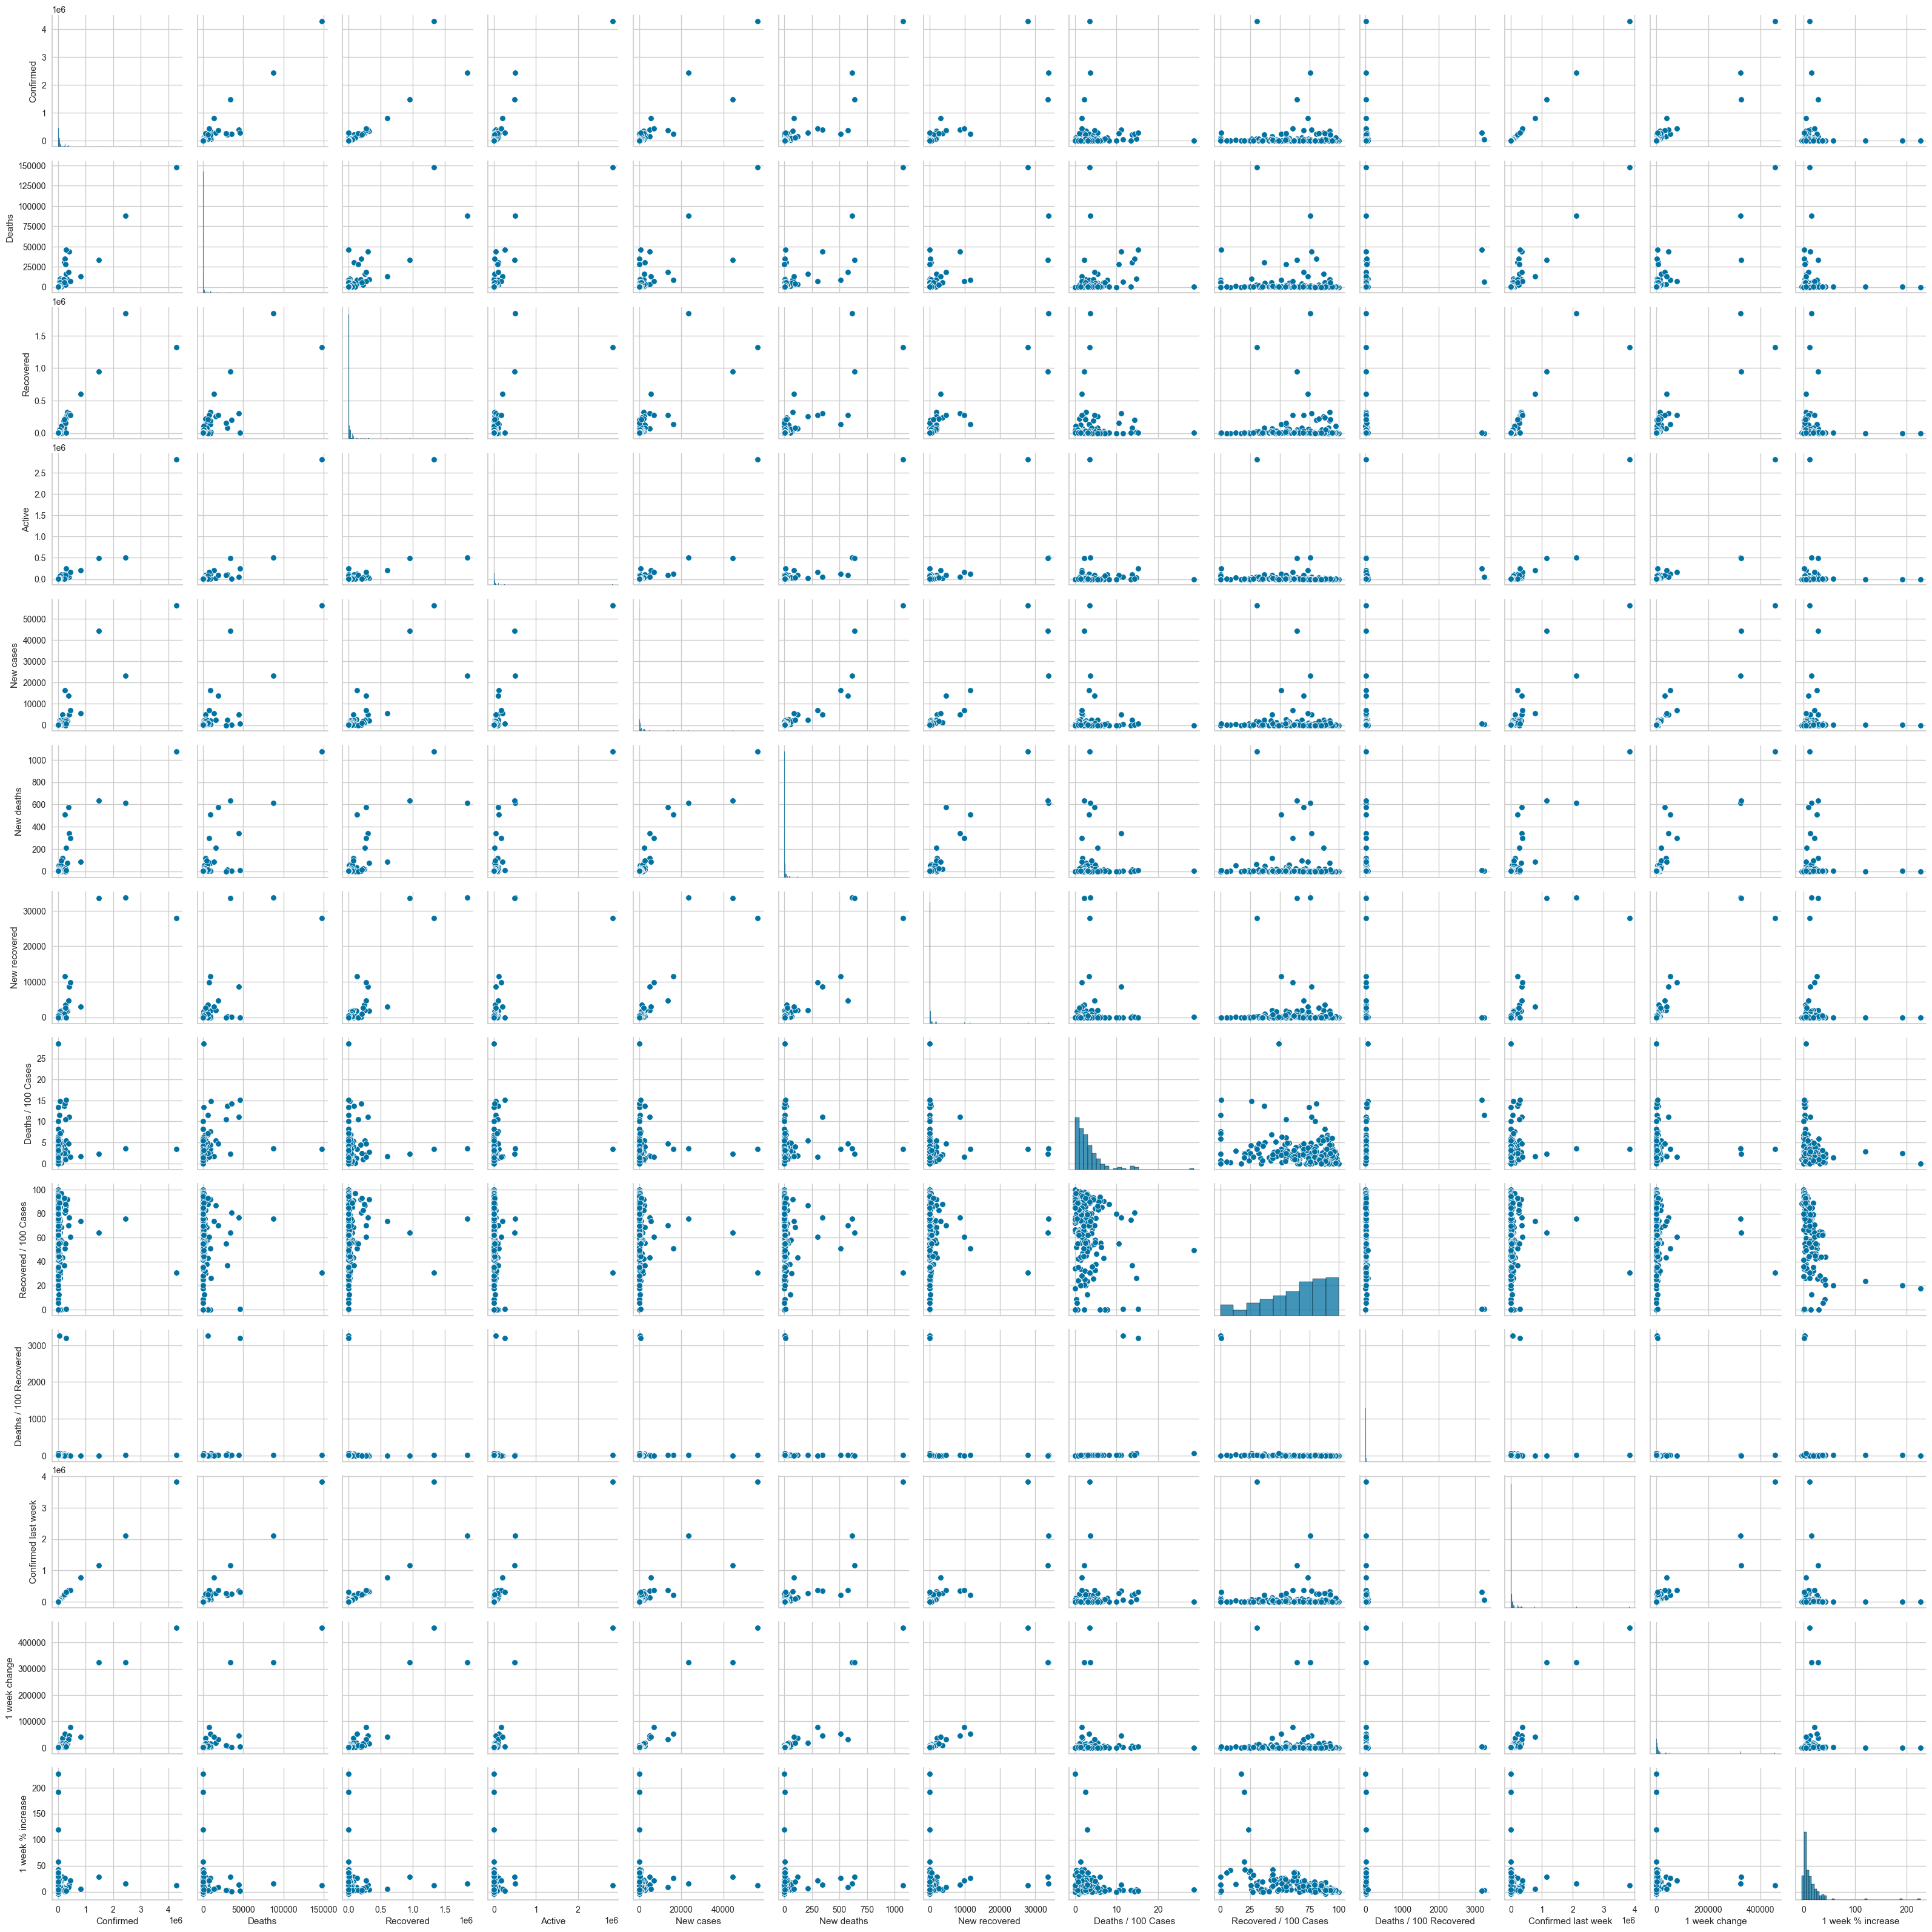

In [23]:
# Biểu đồ scatterplot cho mỗi cặp cột số
sns.pairplot(df_numeric)
plt.show()

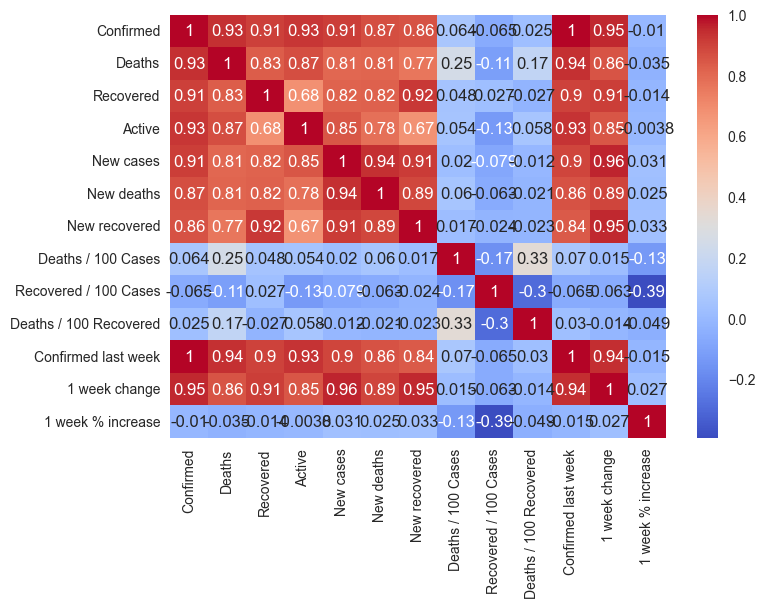

In [25]:
# Heatmap của ma trận tương quan
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

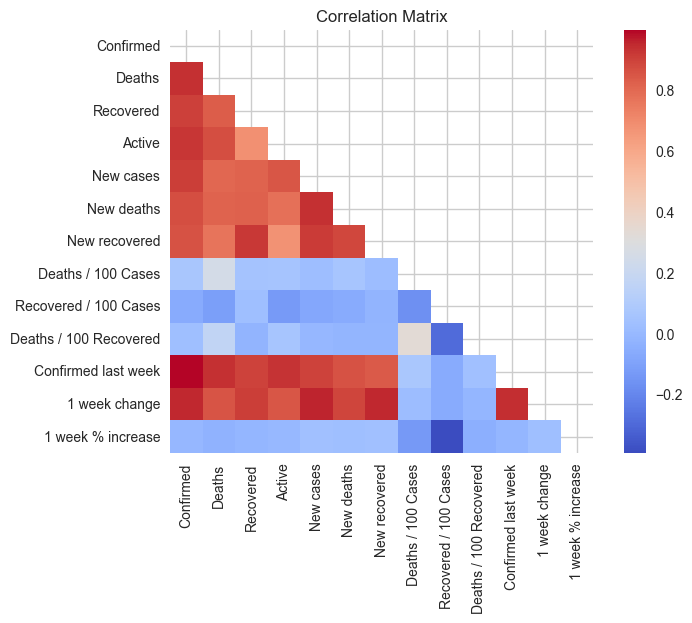

In [26]:
# Tính toán ma trận tương quan
corr = df_numeric.corr()

# Tạo một mặt nạ cho tam giác trên cùng
mask = np.triu(np.ones_like(corr, dtype=bool))

# Vẽ heatmap
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=False, cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Mã hóa tất cả các cột chuỗi
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

# Tính toán ma trận tương quan
corr = df.corr()

# Lấy tương quan của các thuộc tính số với thuộc tính mục tiêu
target_corr = corr["WHO Region"]

print(target_corr)

Country/Region            0.059632
Confirmed                -0.016127
Deaths                   -0.005803
Recovered                -0.001206
Active                   -0.027519
New cases                -0.009019
New deaths               -0.062608
New recovered            -0.021902
Deaths / 100 Cases        0.015550
Recovered / 100 Cases     0.214888
Deaths / 100 Recovered    0.067192
Confirmed last week      -0.015834
1 week change            -0.017379
1 week % increase        -0.075599
WHO Region                1.000000
Name: WHO Region, dtype: float64


In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
import skfuzzy as fuzz

# Đọc dữ liệu
data = pd.read_csv("country_wise_latest.csv")

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

# Xử lý giá trị vô cùng
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Phân cụm dữ liệu bằng Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data["cluster_agg"] = agg_clustering.fit_predict(data_scaled)

# Phân cụm dữ liệu bằng KMeans
kmeans = KMeans(n_clusters=3)
data["cluster_kmeans"] = kmeans.fit_predict(data_scaled)

# Phân cụm dữ liệu bằng Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None
)
data["cluster_fuzzy_cmeans"] = np.argmax(u, axis=0)

# Phân cụm dữ liệu bằng DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
data["cluster_dbscan"] = dbscan.fit_predict(data_scaled)

# In ra kết quả
print(data.head())

   Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0               0      36263    1269      25198    9796        106   
1               1       4880     144       2745    1991        117   
2               2      27973    1163      18837    7973        616   
3               3        907      52        803      52         10   
4               4        950      41        242     667         18   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0          10             18                3.50                  69.49   
1           6             63                2.95                  56.25   
2           8            749                4.16                  67.34   
3           0              0                5.73                  88.53   
4           1              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737  

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

Số lượng cụm tối ưu theo điểm số Silhouette cho KMeans: 2


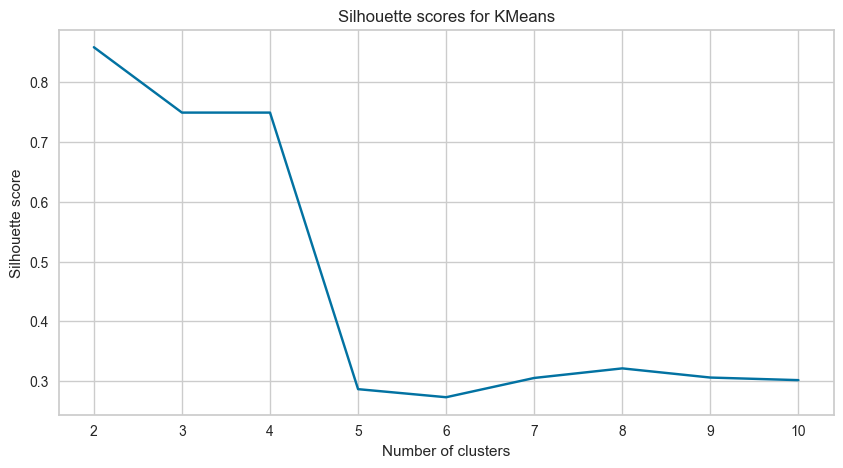

Số lượng cụm tối ưu theo điểm số Silhouette cho Agglomerative Clustering: 2


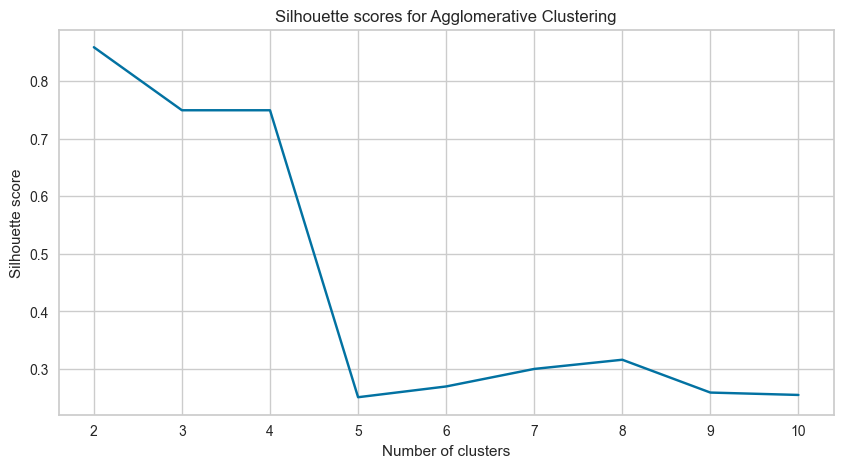

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

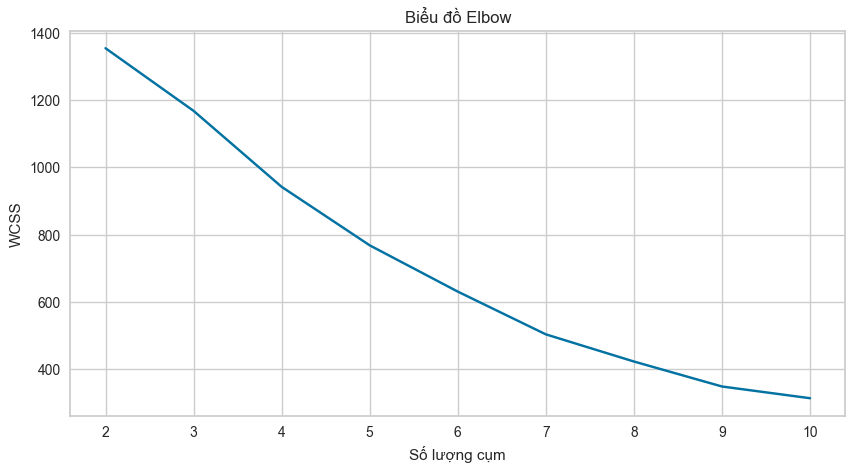

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
import skfuzzy as fuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv("country_wise_latest.csv")

# Lấy nhãn thực sự và chuyển đổi thành dạng số
# Giả sử cột nhãn là 'Country/Region'
true_labels = data["Country/Region"].values
le = LabelEncoder()
true_labels = le.fit_transform(true_labels)

# Loại bỏ cột nhãn khỏi dữ liệu
data = data.drop("Country/Region", axis=1)

# Mã hóa tất cả các cột dạng chuỗi
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

# Xử lý giá trị vô cùng
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

methods = {
    "KMeans": KMeans,
    "Agglomerative Clustering": AgglomerativeClustering,
    # Fuzzy C-means và DBSCAN cần một cách tiếp cận khác nhau
}

for method_name, method in methods.items():
    silhouette_scores = []
    for k in range(2, 11):
        clusterer = method(n_clusters=k)
        labels = clusterer.fit_predict(data_scaled)
        silhouette_scores.append(silhouette_score(data_scaled, labels))

    optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
    print(f"Số lượng cụm tối ưu theo điểm số Silhouette cho {method_name}: {optimal_k}")

    # Vẽ biểu đồ Silhouette scores
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), silhouette_scores, "bx-")
    plt.title(f"Silhouette scores for {method_name}")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.show()

# Tính WCSS cho KMeans với số lượng cụm từ 2 đến 10
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, "bx-")
plt.title("Biểu đồ Elbow")
plt.xlabel("Số lượng cụm")
plt.ylabel("WCSS")
plt.show()

In [14]:
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Sử dụng số lượng cụm tối ưu cho KMeans
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data_scaled)

# Расчет индексов Silhouette, Davies-Bouldin, Calinski-Harabasz для KMeans
silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)
db_kmeans = davies_bouldin_score(data_scaled, kmeans.labels_)
ch_kmeans = calinski_harabasz_score(data_scaled, kmeans.labels_)
print("Индекс Silhouette для KMeans: ", silhouette_kmeans)
print("Индекс Davies-Bouldin для KMeans: ", db_kmeans)
print("Индекс Calinski-Harabasz для KMeans: ", ch_kmeans)

# Использование оптимального количества кластеров для Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_clustering.fit(data_scaled)

# Расчет индексов Silhouette, Davies-Bouldin, Calinski-Harabasz для Agglomerative Clustering
silhouette_agg = silhouette_score(data_scaled, agg_clustering.labels_)
db_agg = davies_bouldin_score(data_scaled, agg_clustering.labels_)
ch_agg = calinski_harabasz_score(data_scaled, agg_clustering.labels_)
print("Индекс Silhouette для Agglomerative Clustering: ", silhouette_agg)
print("Индекс Davies-Bouldin для Agglomerative Clustering: ", db_agg)
print("Индекс Calinski-Harabasz для Agglomerative Clustering: ", ch_agg)

# Использование оптимального количества кластеров для Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_scaled.T, optimal_k, 2, error=0.005, maxiter=1000, init=None
)

# Расчет индексов Silhouette, Davies-Bouldin, Calinski-Harabasz для Fuzzy C-means
silhouette_fuzzy_cmeans = silhouette_score(data_scaled, np.argmax(u, axis=0))
db_fuzzy_cmeans = davies_bouldin_score(data_scaled, np.argmax(u, axis=0))
ch_fuzzy_cmeans = calinski_harabasz_score(data_scaled, np.argmax(u, axis=0))
print("Индекс Silhouette для Fuzzy C-means: ", silhouette_fuzzy_cmeans)
print("Индекс Davies-Bouldin для Fuzzy C-means: ", db_fuzzy_cmeans)
print("Индекс Calinski-Harabasz для Fuzzy C-means: ", ch_fuzzy_cmeans)

# DBSCAN не использует оптимальное количество кластеров, так как он не требует заранее определенного количества кластеров
dbscan = DBSCAN(eps=0.5, min_samples=10)
data["cluster_dbscan"] = dbscan.fit_predict(data_scaled)

# Проверка созданного количества кластеров
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Количество кластеров: ", n_clusters)
# Nếu có nhiều hơn 1 cụm, tính chỉ số Silhouette, Davies-Bouldin, Calinski-Harabasz
if n_clusters > 1:
    silhouette_dbscan = silhouette_score(data_scaled, dbscan.labels_)
    db_dbscan = davies_bouldin_score(data_scaled, dbscan.labels_)
    ch_dbscan = calinski_harabasz_score(data_scaled, dbscan.labels_)
    print("Индекс Silhouette для DBSCAN: ", silhouette_dbscan)
    print("Индекс Davies-Bouldin для DBSCAN: ", db_dbscan)
    print("Индекс Calinski-Harabasz для DBSCAN: ", ch_dbscan)
else:
    print(
        "Невозможно рассчитать индексы Silhouette, Davies-Bouldin, Calinski-Harabasz для DBSCAN, так как создан только один кластер."
    )

Индекс Silhouette для KMeans:  0.8422532370133237
Индекс Davies-Bouldin для KMeans:  0.492991904674355
Индекс Calinski-Harabasz для KMeans:  156.56591624649306
Индекс Silhouette для Agglomerative Clustering:  0.8422532370133237
Индекс Davies-Bouldin для Agglomerative Clustering:  0.492991904674355
Индекс Calinski-Harabasz для Agglomerative Clustering:  156.56591624649306
Индекс Silhouette для Fuzzy C-means:  0.24031844392256416
Индекс Davies-Bouldin для Fuzzy C-means:  1.781475874068944
Индекс Calinski-Harabasz для Fuzzy C-means:  22.23607113095773
Количество кластеров:  0
Невозможно рассчитать индексы Silhouette, Davies-Bouldin, Calinski-Harabasz для DBSCAN, так как создан только один кластер.


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


На основе индексов Silhouette, Davies-Bouldin и Calinski-Harabasz, методы KMeans и Agglomerative Clustering показывают наилучшие результаты с индексом Silhouette 0.8422532370133237, что значительно выше, чем у Fuzzy C-means (0.24031844392256416). Индекс Davies-Bouldin для KMeans и Agglomerative Clustering также ниже (0.492991904674355), что указывает на лучшую сегментацию кластеров, по сравнению с Fuzzy C-means (1.781475874068944). 

Метод DBSCAN не создает более одного кластера, поэтому невозможно вычислить индексы Silhouette, Davies-Bouldin и Calinski-Harabasz.

Таким образом, на основе этих индексов, KMeans или Agglomerative Clustering могут быть лучшим выбором для этого набора данных. Однако, KMeans обычно предпочтительнее, поскольку он проще и понятнее, чем Agglomerative Clustering.

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


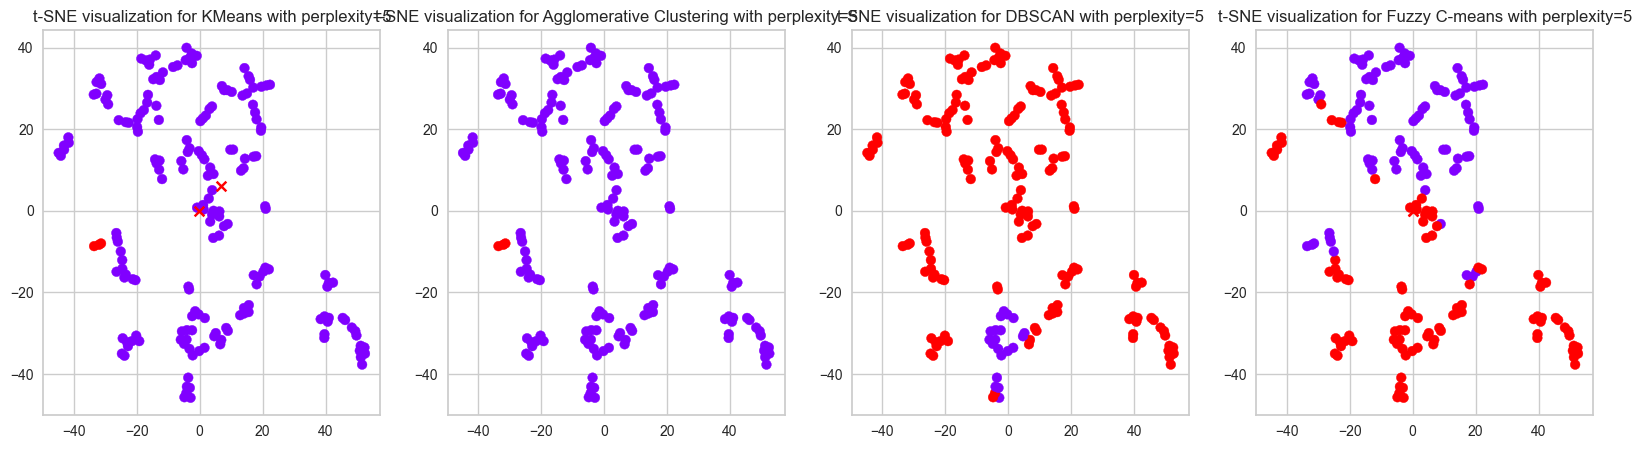

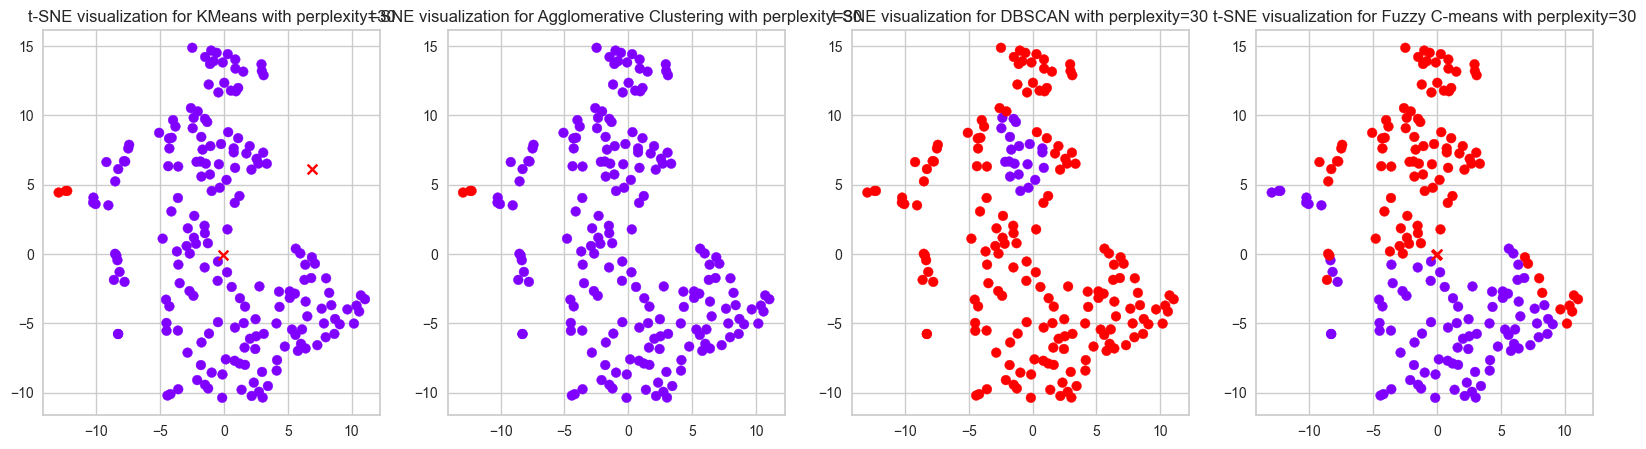

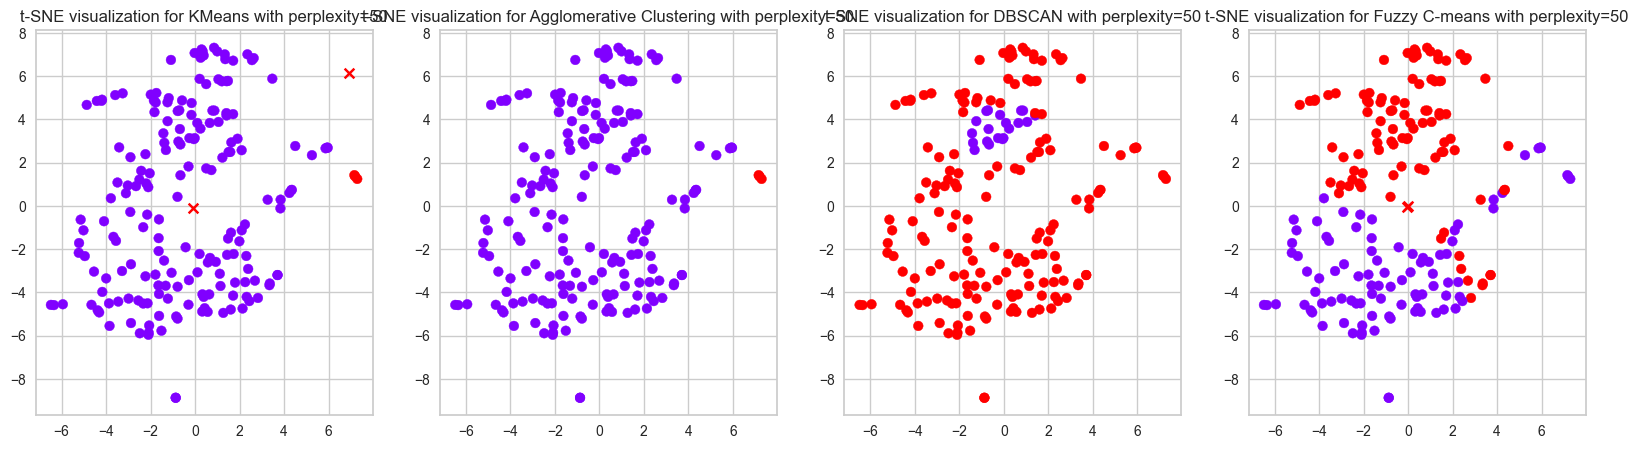

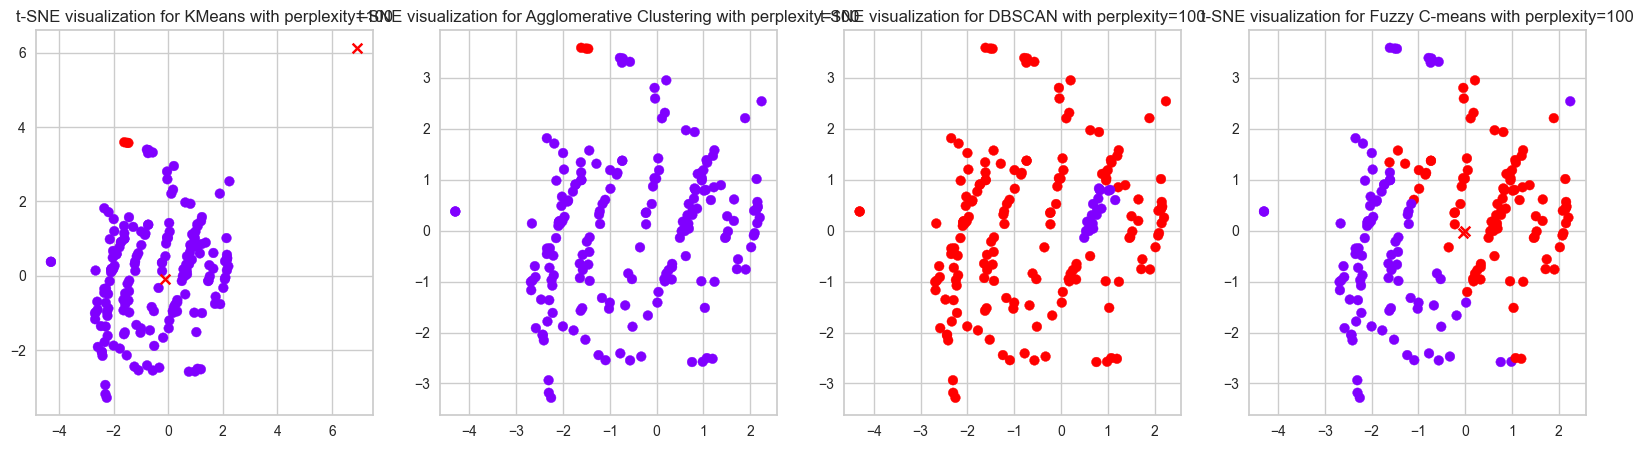

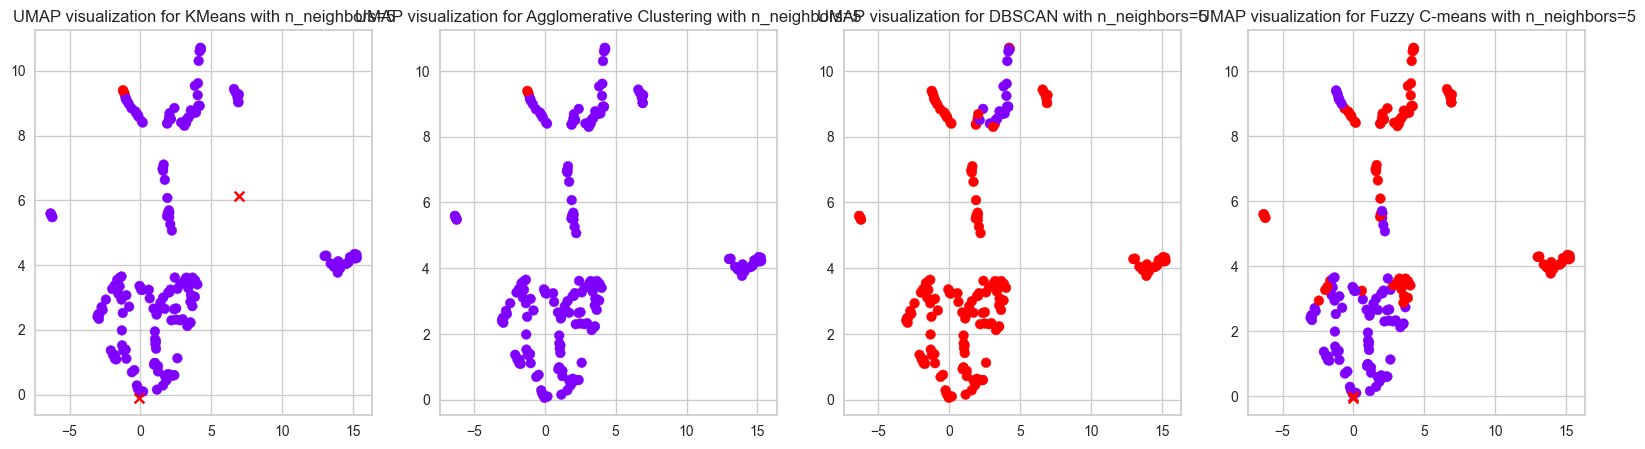

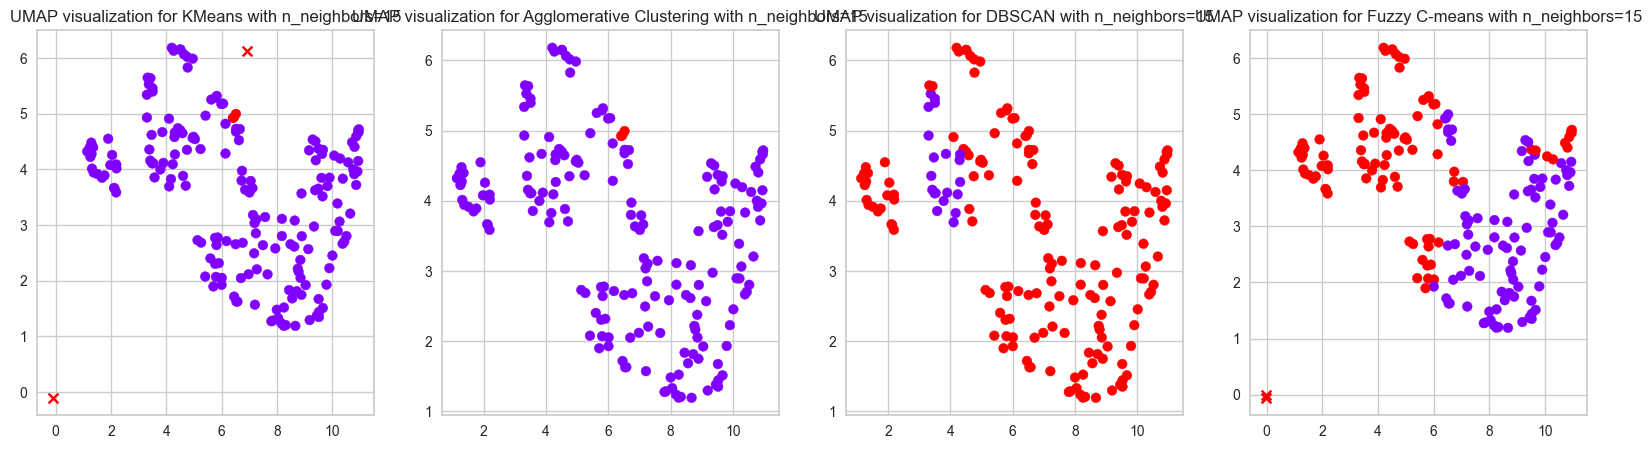

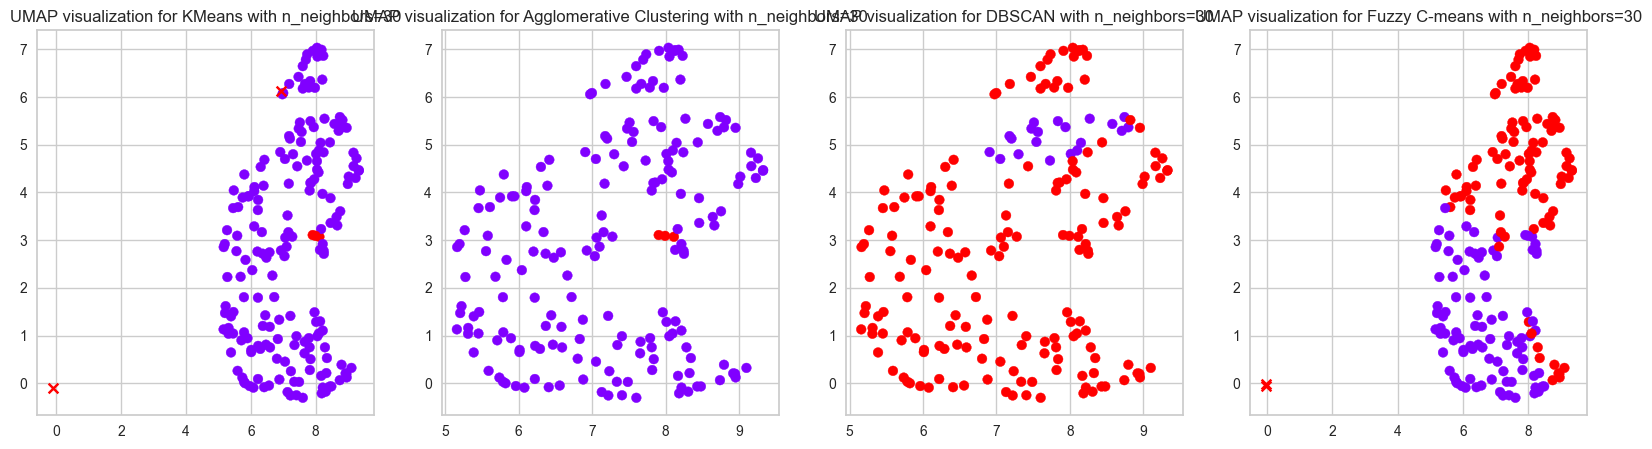

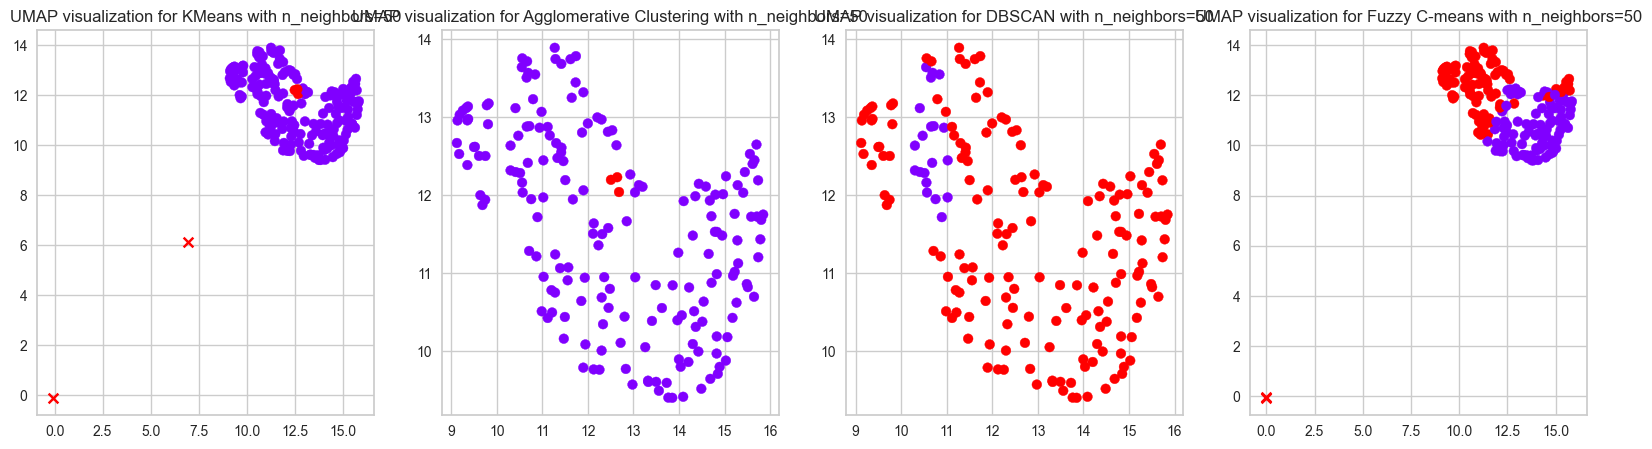

In [20]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import cdist
import skfuzzy as fuzz
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Phân cụm dữ liệu bằng KMeans với số lượng cụm tối ưu
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data_scaled)

# Phân cụm dữ liệu bằng Agglomerative Clustering với số lượng cụm tối ưu
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_clustering.fit(data_scaled)

# Phân cụm dữ liệu bằng Fuzzy C-means với số lượng cụm tối ưu
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_scaled.T, optimal_k, 2, error=0.005, maxiter=1000, init=None
)

# Phân cụm dữ liệu bằng DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(data_scaled)

# Tạo một bản đồ màu
colors = cm.rainbow(np.linspace(0, 1, optimal_k))

# Sử dụng t-SNE và UMAP để giảm kích thước dữ liệu
for perplexity in [5, 30, 50, 100]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    data_tsne = tsne.fit_transform(data_scaled)

    plt.figure(figsize=(20, 5))
    for i, (model, name) in enumerate(
        [
            (kmeans, "KMeans"),
            (agg_clustering, "Agglomerative Clustering"),
            (dbscan, "DBSCAN"),
            (fuzz.cluster.cmeans, "Fuzzy C-means"),
        ]
    ):
        plt.subplot(1, 4, i + 1)
        if name != "Fuzzy C-means":
            plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=colors[model.labels_])
            if hasattr(model, "cluster_centers_"):
                plt.scatter(
                    model.cluster_centers_[:, 0],
                    model.cluster_centers_[:, 1],
                    c="red",
                    marker="x",
                )
        else:
            plt.scatter(
                data_tsne[:, 0], data_tsne[:, 1], c=colors[np.argmax(u, axis=0)]
            )
            plt.scatter(cntr[:, 0], cntr[:, 1], c="red", marker="x")
        plt.title(f"t-SNE visualization for {name} with perplexity={perplexity}")
    plt.show()

for n_neighbors in [5, 15, 30, 50]:
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    data_umap = reducer.fit_transform(data_scaled)

    plt.figure(figsize=(20, 5))
    for i, (model, name) in enumerate(
        [
            (kmeans, "KMeans"),
            (agg_clustering, "Agglomerative Clustering"),
            (dbscan, "DBSCAN"),
            (fuzz.cluster.cmeans, "Fuzzy C-means"),
        ]
    ):
        plt.subplot(1, 4, i + 1)
        if name != "Fuzzy C-means":
            plt.scatter(data_umap[:, 0], data_umap[:, 1], c=colors[model.labels_])
            if hasattr(model, "cluster_centers_"):
                plt.scatter(
                    model.cluster_centers_[:, 0],
                    model.cluster_centers_[:, 1],
                    c="red",
                    marker="x",
                )
        else:
            plt.scatter(
                data_umap[:, 0], data_umap[:, 1], c=colors[np.argmax(u, axis=0)]
            )
            plt.scatter(cntr[:, 0], cntr[:, 1], c="red", marker="x")
        plt.title(f"UMAP visualization for {name} with n_neighbors={n_neighbors}")
    plt.show()